In [150]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import string
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("sample_data/train.csv",sep =',')
test = pd.read_csv("sample_data/test.csv",sep =',')

In [ ]:
train = train.dropna()
test = test.dropna()

In [ ]:
data_train = train['cout']  + train['difficulte'] + train['ingredients'] + train['recette'] + train['titre']
data_test = test['cout'] + test['difficulte'] + test['ingredients'] + test['recette'] + test['titre']

# Methode Baseline

## Guess majoritaire

In [ ]:
print(train["type"].value_counts())
print(train["type"].value_counts().idxmax())

type
Plat principal    5802
Dessert           3762
Entrée            2909
Name: count, dtype: int64
Plat principal


In [ ]:
def get_baseline(df, column):
  element = df[column].value_counts().idxmax()
  return np.full((df.shape[0], ), element)

In [ ]:
def accuracy_score(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = correct_predictions / len(y_true)
    return accuracy

In [145]:
y_test = test["type"]
accuracy_score(y_test, get_baseline(test, "type"))

0.46397694524495675

# Methode TF-IDF

## Creation d'un corpus complet

In [ ]:
corpus = pd.concat([train, test])
corpus["recette"] = corpus["recette"].str.lower()
train['recette'] = train["recette"].str.lower()
test['recette'] = test["recette"].str.lower()

In [ ]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [ ]:
corpus_global = pd.concat([data_train, data_test])
corpus_global = corpus_global.str.lower()
corpus_global = corpus_global.apply(remove_punctuation)

## Vectorisation des données

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus["recette"])
X_train = vectorizer.transform(train['recette'])
X_test = vectorizer.transform(test['recette'])

In [ ]:
vectorizer_global = TfidfVectorizer()
vectorizer.fit(corpus_global)
X_train_global = vectorizer.transform(data_train)
X_test_global = vectorizer.transform(data_test)

In [ ]:
y_train = train["type"]
y_test = test["type"]

## Entrainement / Evaluation des modèles

In [151]:
logreg = LogisticRegression(random_state=0).fit(X_train_global, y_train)
y_pred = logreg.predict(X_test_global)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))

                precision    recall  f1-score   support

       Dessert       0.98      0.99      0.99       407
        Entrée       0.78      0.70      0.74       337
Plat principal       0.85      0.90      0.87       644

      accuracy                           0.88      1388
     macro avg       0.87      0.86      0.87      1388
  weighted avg       0.88      0.88      0.88      1388

0.8756805759732514


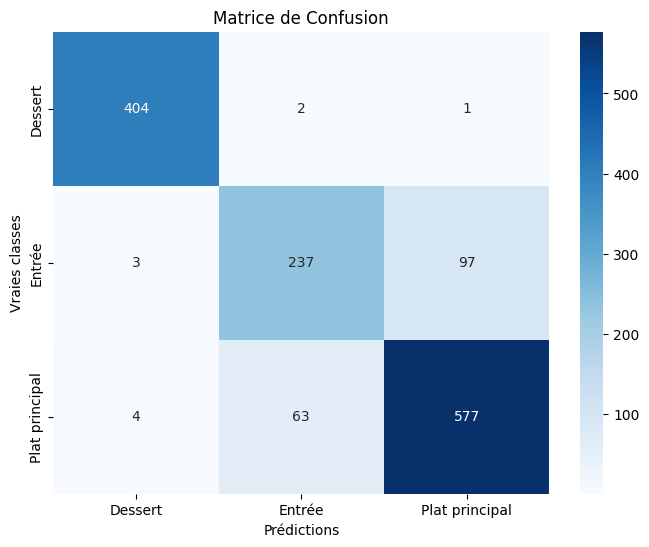

In [152]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()

In [153]:
SVC_global = SVC()
SVC_global.fit(X_train_global, y_train)
y_pred = SVC_global.predict(X_test_global)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))

                precision    recall  f1-score   support

       Dessert       0.98      1.00      0.99       407
        Entrée       0.77      0.71      0.74       337
Plat principal       0.86      0.89      0.87       644

      accuracy                           0.87      1388
     macro avg       0.87      0.86      0.86      1388
  weighted avg       0.87      0.87      0.87      1388

0.8723969360670913


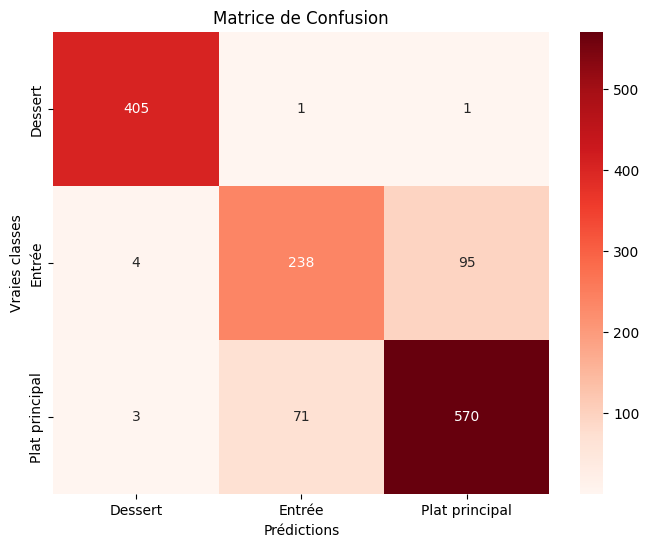

In [154]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()

In [ ]:
SVC_recette = SVC()
SVC_recette.fit(X_train, y_train)
y_pred = SVC_recette.predict(X_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))

                precision    recall  f1-score   support

       Dessert       0.97      0.99      0.98       407
        Entrée       0.79      0.69      0.73       337
Plat principal       0.85      0.90      0.87       644

      accuracy                           0.87      1388
     macro avg       0.87      0.86      0.86      1388
  weighted avg       0.87      0.87      0.87      1388

0.8714185719404623


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=15, metric="cosine")
neigh.fit(X_train_global, train["type"])
y_pred = neigh.predict(X_test_global)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

       Dessert       0.91      0.99      0.95       407
        Entrée       0.71      0.45      0.55       337
Plat principal       0.77      0.88      0.82       644

      accuracy                           0.81      1388
     macro avg       0.80      0.77      0.77      1388
  weighted avg       0.80      0.81      0.79      1388



In [ ]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train_global, train["type"])
y_pred = clf.predict(X_test_global)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

       Dessert       0.94      0.98      0.96       407
        Entrée       1.00      0.07      0.14       337
Plat principal       0.68      0.99      0.80       644

      accuracy                           0.76      1388
     macro avg       0.87      0.68      0.63      1388
  weighted avg       0.83      0.76      0.69      1388



# Word2Vec

In [ ]:
def get_vector(text, model):
    vectors = [model.wv[word] for word in text if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

In [ ]:
#processed_text_train = [simple_preprocess(sentence, min_len=1) for sentence in train["recette"]]
#processed_text_test = [simple_preprocess(sentence, min_len=1) for sentence in test["recette"]]
processed_text_train = [simple_preprocess(sentence, min_len=1) for sentence in data_train]
processed_text_test = [simple_preprocess(sentence, min_len=1) for sentence in data_test]
modelW2V = Word2Vec(sentences=processed_text_train, vector_size=100, window=5, min_count=1, workers=4)
train_vectors = np.array([get_vector(text, modelW2V) for text in processed_text_train])
test_vectors = np.array([get_vector(text, modelW2V) for text in processed_text_test])


In [ ]:
logreg = LogisticRegression(random_state=0).fit(train_vectors, y_train)
y_pred = logreg.predict(test_vectors)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

       Dessert       0.98      0.99      0.98       407
        Entrée       0.72      0.61      0.66       337
Plat principal       0.81      0.87      0.84       644

      accuracy                           0.84      1388
     macro avg       0.84      0.82      0.83      1388
  weighted avg       0.84      0.84      0.84      1388



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
classifier = SVC(kernel='linear')
classifier.fit(train_vectors, y_train)
y_pred = classifier.predict(test_vectors)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

       Dessert       0.98      0.99      0.99       407
        Entrée       0.72      0.59      0.65       337
Plat principal       0.81      0.88      0.84       644

      accuracy                           0.84      1388
     macro avg       0.83      0.82      0.82      1388
  weighted avg       0.84      0.84      0.84      1388



In [ ]:
neigh = KNeighborsClassifier(n_neighbors=20, metric="cosine")
neigh.fit(train_vectors, train["type"])
y_pred = neigh.predict(test_vectors)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

       Dessert       0.94      0.99      0.97       407
        Entrée       0.75      0.42      0.54       337
Plat principal       0.76      0.91      0.83       644

      accuracy                           0.82      1388
     macro avg       0.82      0.77      0.78      1388
  weighted avg       0.81      0.82      0.80      1388



In [ ]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(train_vectors, train["type"])
y_pred = clf.predict(test_vectors)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

       Dessert       0.94      0.99      0.97       407
        Entrée       0.70      0.43      0.53       337
Plat principal       0.76      0.89      0.82       644

      accuracy                           0.81      1388
     macro avg       0.80      0.77      0.77      1388
  weighted avg       0.80      0.81      0.79      1388



In [155]:
gnb = GaussianNB()
y_pred = gnb.fit(train_vectors, y_train).predict(test_vectors)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

       Dessert       0.92      0.98      0.95       407
        Entrée       0.52      0.58      0.55       337
Plat principal       0.80      0.72      0.75       644

      accuracy                           0.76      1388
     macro avg       0.75      0.76      0.75      1388
  weighted avg       0.77      0.76      0.76      1388



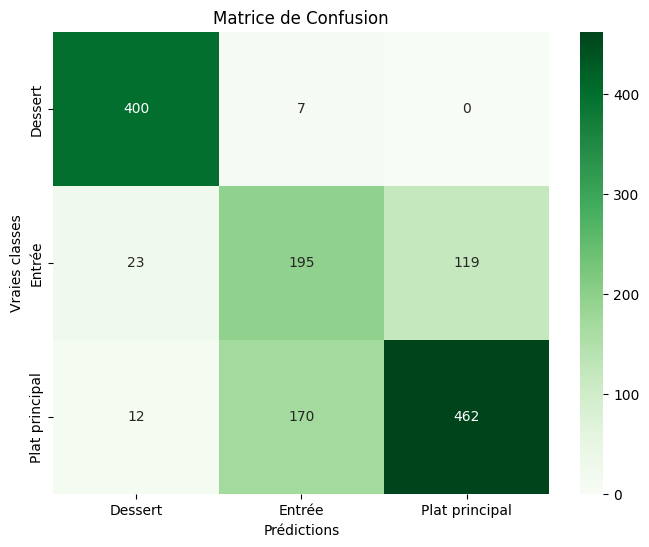

In [156]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()